In [27]:
from typing import TypedDict
from langchain_groq import ChatGroq
from langgraph.graph import START, END, StateGraph
from dotenv import load_dotenv

In [28]:
load_dotenv()
child_graph_llm = ChatGroq(model="llama-3.3-70b-versatile",temperature=0.7)
parent_graph_llm = ChatGroq(model="llama-3.3-70b-versatile", temperature=0.7)

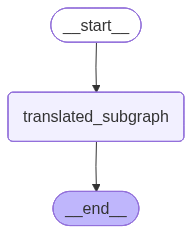

In [29]:
class subgraph_state(TypedDict):
    input_text: str
    output_text: str

def translated_subgraph(state: subgraph_state):
    prompt = f"""
    you will received an english text
    convert it into PURE URDU language.
		NOTE:-
			don't add any content by your self.
    TEXT IS:-
		{state['input_text']}
    """
    output_text = child_graph_llm.invoke(prompt)
    return {'output_text': output_text}

graph = StateGraph(subgraph_state)
graph.add_node('translated_subgraph', translated_subgraph)
graph.add_edge(START, 'translated_subgraph')
graph.add_edge('translated_subgraph', END)
subgraph = graph.compile()
subgraph

In [30]:
class parent_state(TypedDict):
    question: str
    english_text: str
    urdu_text: str

def generated_node(state: parent_state):
    prompt = f"""Generate answer of the following question: {state['question']}"""
    generated_output = parent_graph_llm.invoke(prompt)
    return {'english_text': generated_output}

def translation_graph(state: parent_state):
    urdu_translation = subgraph.invoke({'input_text': state['english_text']})
    return {'urdu_text': urdu_translation}

parentgraph = StateGraph(parent_state)
parentgraph.add_node('generated_node', generated_node)
parentgraph.add_node('translation_graph', translation_graph)
parentgraph.add_edge(START, 'generated_node')
parentgraph.add_edge('generated_node', 'translation_graph')
parentgraph.add_edge('translation_graph', END)
parent_graph = parentgraph.compile()

parent_graph.invoke({'question': 'what is llm?'})

{'question': 'what is llm?',
 'english_text': AIMessage(content='LLM stands for Large Language Model. It refers to a type of artificial intelligence (AI) designed to process and understand human language at a large scale. LLMs are trained on vast amounts of text data, which enables them to learn patterns, relationships, and structures within language.\n\nThese models are typically based on deep learning architectures, such as transformer models, and are trained using self-supervised learning techniques. This means they learn to predict the next word in a sequence of text, given the context of the previous words. This process allows them to develop a deep understanding of language, including grammar, syntax, semantics, and pragmatics.\n\nLLMs have many applications, including:\n\n1. **Natural Language Processing (NLP)**: LLMs can be used for tasks such as language translation, text summarization, sentiment analysis, and question answering.\n2. **Text Generation**: LLMs can generate cohe